In [1]:
import numpy as np
import pandas as pd 
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt 

In [2]:
import tensorflow as tf
from tensorflow import keras 

In [3]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full,Y_train_full), (X_test,Y_test) = fashion_mnist.load_data()

In [4]:
class_names=["T-shirt/top","Trousers","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

In [5]:
X_train_full = X_train_full.reshape((60000 , 28 , 28 , 1))
X_test = X_test.reshape((10000 ,28 ,28, 1))

In [6]:
X_train_n = X_train_full / 255.
X_test_n = X_test / 255.

In [7]:
X_valid , X_train = X_train_n[:5000] , X_train_n[5000:]
Y_valid , Y_train = Y_train_full[:5000] , Y_train_full[5000:]
X_test = X_test_n

In [8]:
np.random.seed(42)
tf.random.set_seed(42)

In [9]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(filters = 32 , kernel_size = (3,3) ,strides=1 ,padding = 'valid' , activation ='relu',input_shape =(28,28,1)))
model.add(keras.layers.MaxPooling2D((2,2)))


model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation = "softmax"))

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 5408)              0         
_________________________________________________________________
dense (Dense)                (None, 300)               1622700   
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 1,654,130
Trainable params: 1,654,130
Non-trainable params: 0
______________________________________________

In [11]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer = "sgd",
              metrics =["accuracy"])

In [12]:
model_history= model.fit(X_train ,Y_train , epochs=30 , validation_data=(X_valid , Y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 37s 675us/sample - loss: 0.7278 - accuracy: 0.7449 - val_loss: 0.5013 - val_accuracy: 0.8232
Epoch 2/30
55000/55000 [==============================] - 36s 659us/sample - loss: 0.4796 - accuracy: 0.8261 - val_loss: 0.4707 - val_accuracy: 0.8252
Epoch 3/30
55000/55000 [==============================] - 34s 627us/sample - loss: 0.4263 - accuracy: 0.8467 - val_loss: 0.4249 - val_accuracy: 0.8438
Epoch 4/30
55000/55000 [==============================] - 34s 613us/sample - loss: 0.3853 - accuracy: 0.8616 - val_loss: 0.4033 - val_accuracy: 0.8564
Epoch 5/30
55000/55000 [==============================] - 33s 596us/sample - loss: 0.3576 - accuracy: 0.8706 - val_loss: 0.3571 - val_accuracy: 0.8736
Epoch 6/30
55000/55000 [==============================] - 31s 558us/sample - loss: 0.3357 - accuracy: 0.8792 - val_loss: 0.3431 - val_accuracy: 0.8764
Epoch 7/30
55000/55000 [=====================

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\pilla\anaconda3\envs\tensorflow_env\lib\site-packages\IPython\core\interactiveshell.py", line 3343, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-13-9a0b7b28b6fd>", line 5, in <module>
    plt.gca.set_ylim(0,1)
AttributeError: 'function' object has no attribute 'set_ylim'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\pilla\anaconda3\envs\tensorflow_env\lib\site-packages\IPython\core\interactiveshell.py", line 2044, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'AttributeError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\pilla\anaconda3\envs\tensorflow_env\lib\site-packages\IPython\core\ultratb.py", line 1169, in get_records
    return _fixed_getinnerframes(etb, number_of_li

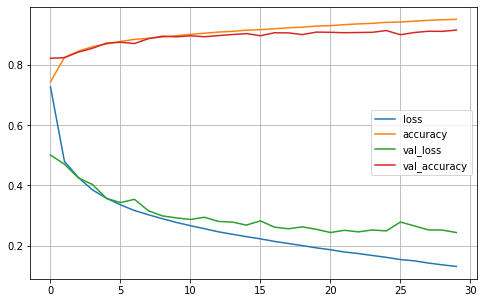

In [ ]:
import pandas as pd

pd.DataFrame(model_history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca.set_ylim(0,1)
plt.show()

In [13]:
ev = model.evaluate(X_test_n ,Y_test)

ERROR! Session/line number was not unique in database. History logging moved to new session 95
10000/10000 [==============================] - 2s 155us/sample - loss: 0.2561 - accuracy: 0.9117


In [14]:
ev

[0.2560961047232151, 0.9117]

In [15]:
X_new = X_test[:3]

In [16]:
Y_pred = model.predict_classes(X_new)
Y_pred

array([9, 2, 1], dtype=int64)

In [17]:
Y_test

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

AxesImage(54,36;334.8x217.44)


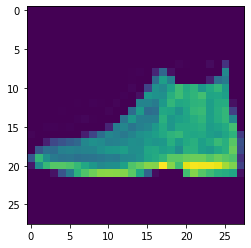

In [18]:
print(plt.imshow(X_test[0].reshape((28,28))))